In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:

!pip install -q kaggle
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d arnabchaki/data-science-salaries-2023


Dataset URL: https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023
License(s): DbCL-1.0
  0% 0.00/25.4k [00:00<?, ?B/s]
100% 25.4k/25.4k [00:00<00:00, 33.9MB/s]


In [ ]:
!unzip data-science-salaries-2023.zip

Archive:  data-science-salaries-2023.zip
  inflating: ds_salaries.csv         


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/ds_salaries.csv')

In [ ]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


# EDA

In [ ]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [ ]:
df.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


## work data value_count

In [ ]:
df['work_year'].value_counts()

,count
work_year,
2023,1785
2022,1664
2021,230
2020,76


In [ ]:
import matplotlib.pyplot as plt

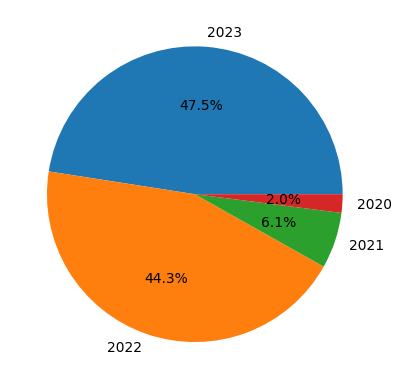

In [ ]:
plt.pie(df['work_year'].value_counts(),labels=df['work_year'].value_counts().index,autopct='%1.1f%%')
plt.show()

## experience_level value_count

In [ ]:
df['experience_level'].value_counts()

,count
experience_level,
SE,2516
MI,805
EN,320
EX,114


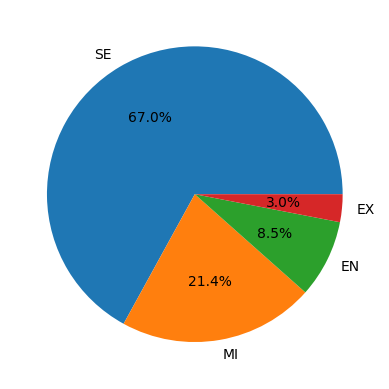

In [ ]:
plt.pie(df['experience_level'].value_counts(),labels=df['experience_level'].value_counts().index,autopct='%1.1f%%')
plt.show()

## employment_type

In [ ]:
df['employment_type'].value_counts()

,count
employment_type,
FT,3718
PT,17
CT,10
FL,10


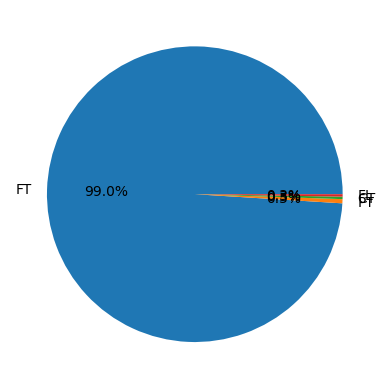

In [ ]:
plt.pie(df['employment_type'].value_counts(),labels=df['employment_type'].value_counts().index,autopct='%1.1f%%')
plt.show()

##job_title value_count

In [ ]:
df['job_title'].value_counts()

,count
job_title,
Data Engineer,1040
Data Scientist,840
Data Analyst,612
Machine Learning Engineer,289
Analytics Engineer,103
...,...
Principal Machine Learning Engineer,1
Azure Data Engineer,1
Manager Data Management,1


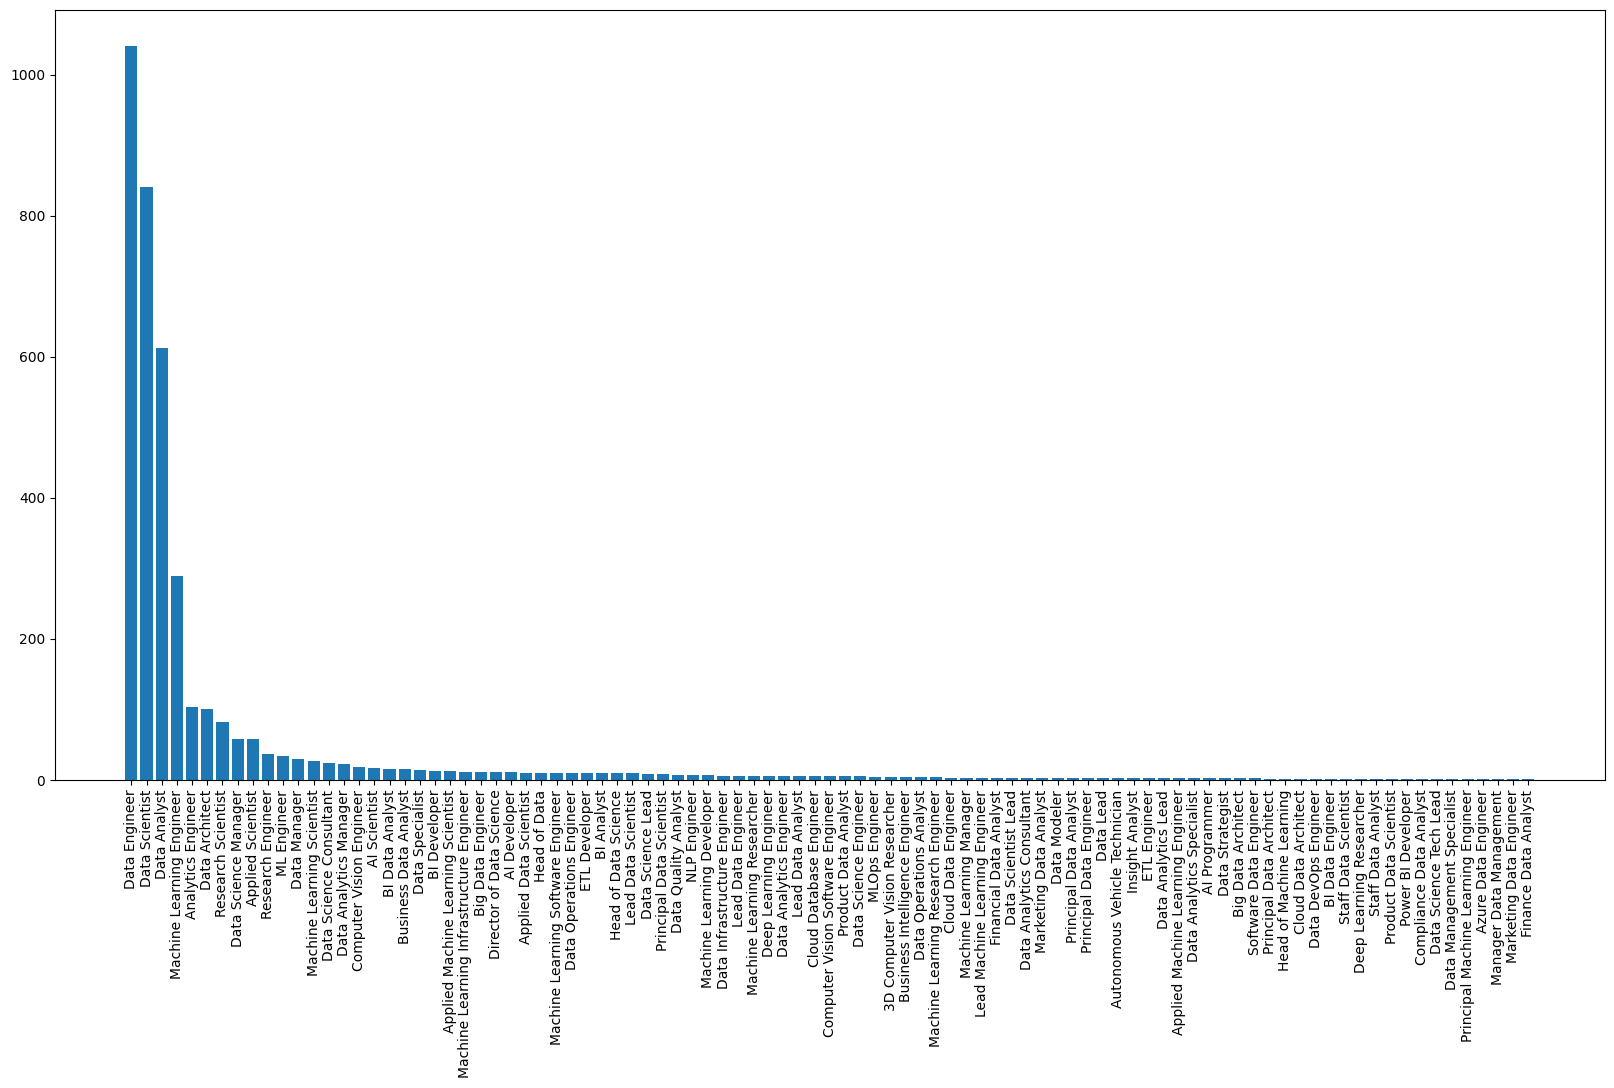

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(df['job_title'].value_counts().index,df['job_title'].value_counts())
plt.xticks(rotation=90)
plt.show()

## salary_currency

In [ ]:
df['salary_currency'].value_counts()

,count
salary_currency,
USD,3224
EUR,236
GBP,161
INR,60
CAD,25
AUD,9
SGD,6
BRL,6
PLN,5


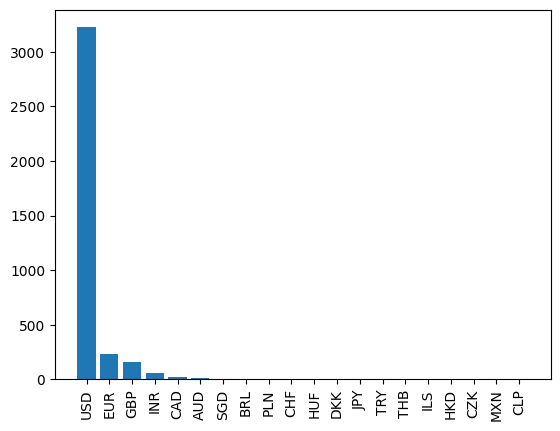

In [ ]:
plt.bar(df['salary_currency'].value_counts().index,df['salary_currency'].value_counts())
plt.xticks(rotation=90)
plt.show()

## employee_residence

In [ ]:
df['employee_residence'].value_counts()

,count
employee_residence,
US,3004
GB,167
CA,85
ES,80
IN,71
...,...
BA,1
AM,1
CY,1


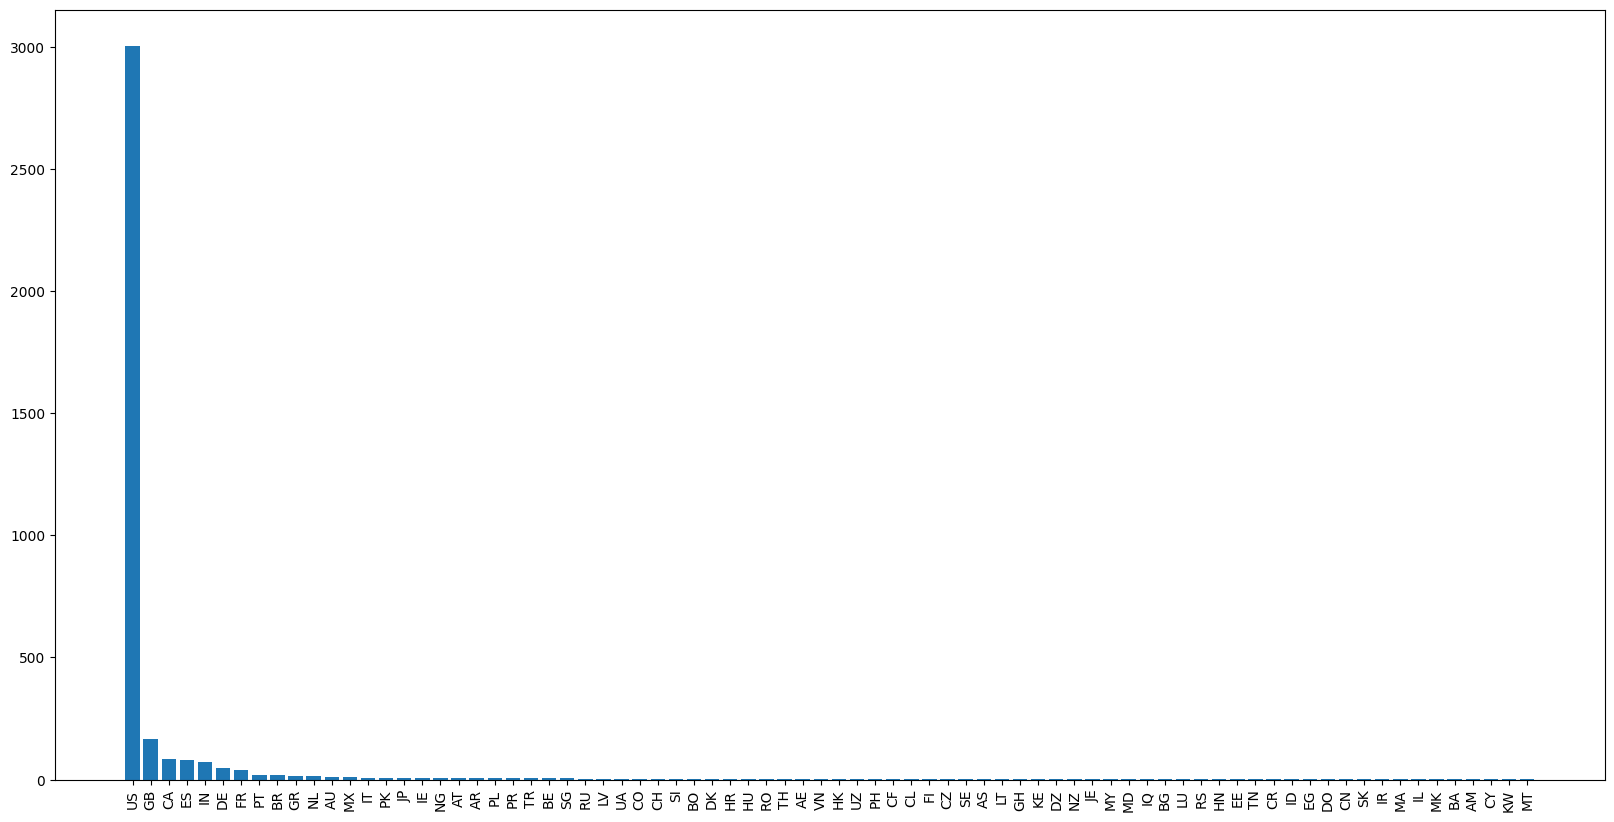

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(df['employee_residence'].value_counts().index,df['employee_residence'].value_counts())
plt.xticks(rotation=90)
plt.show()

## remote_ratio

In [ ]:
df['remote_ratio'].value_counts()

,count
remote_ratio,
0,1923
100,1643
50,189


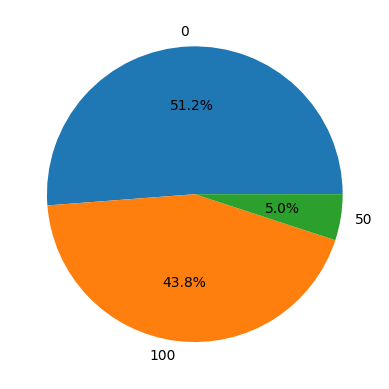

In [ ]:
plt.pie(df['remote_ratio'].value_counts(),labels=df['remote_ratio'].value_counts().index,autopct='%1.1f%%')
plt.show()

## company_location

In [ ]:
df['company_location'].value_counts()

,count
company_location,
US,3040
GB,172
CA,87
ES,77
IN,58
...,...
MK,1
BS,1
IR,1


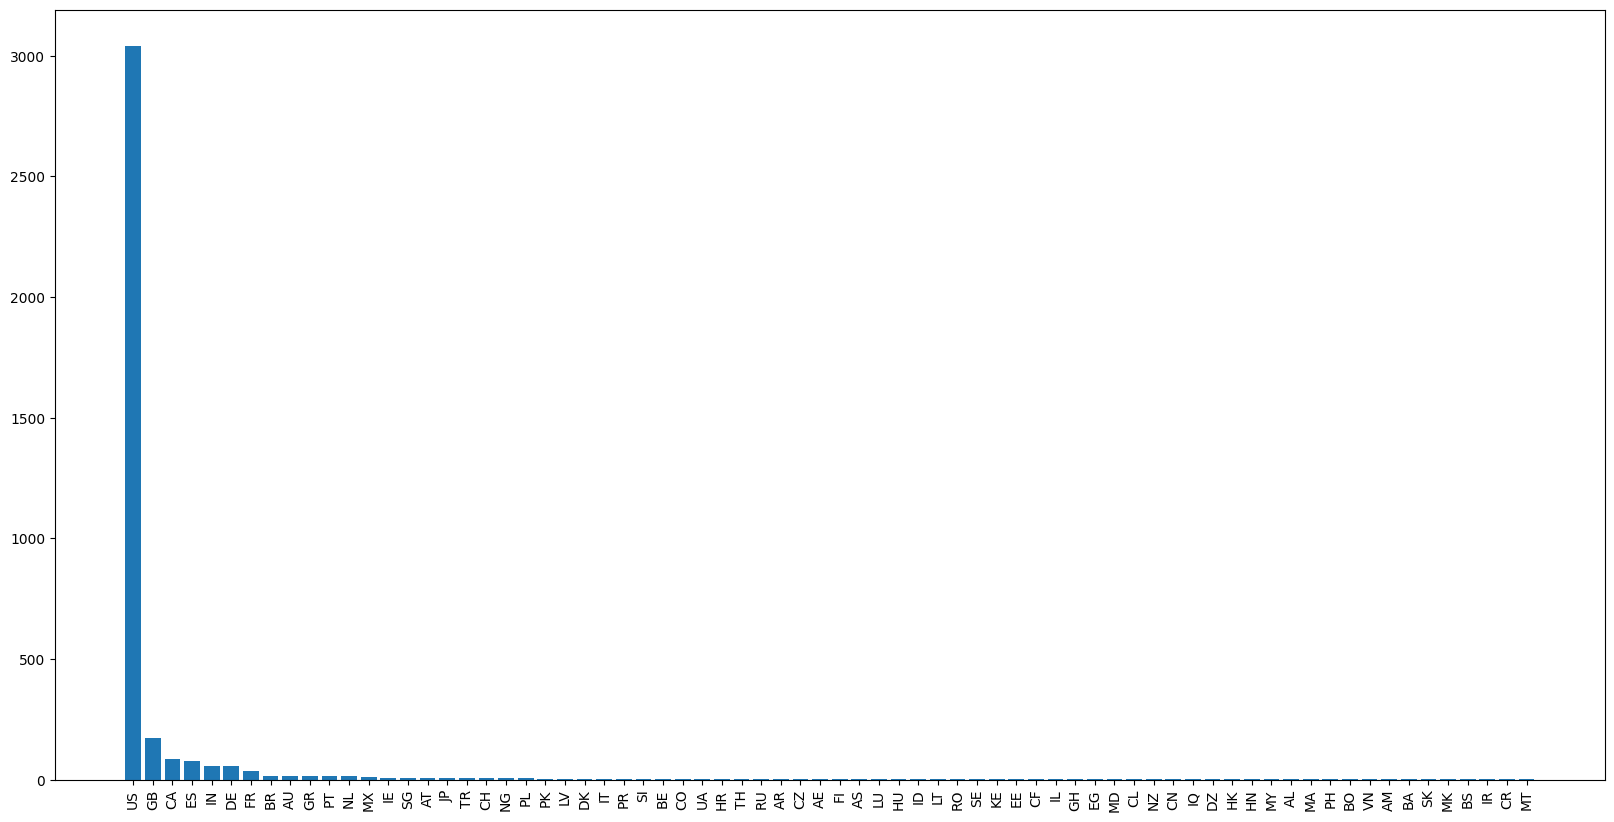

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(df['company_location'].value_counts().index,df['company_location'].value_counts())
plt.xticks(rotation=90)
plt.show()

## company_size

In [ ]:
df['company_size'].value_counts()


,count
company_size,
M,3153
L,454
S,148


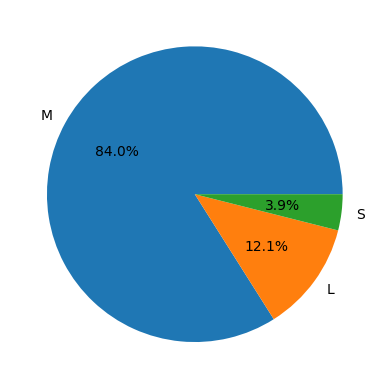

In [ ]:
plt.pie(df['company_size'].value_counts(),labels=df['company_size'].value_counts().index,autopct='%1.1f%%')
plt.show()

## jop title vs average salary

In [ ]:
comp1=df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)

In [ ]:
comp1

,salary_in_usd
job_title,
Data Science Tech Lead,375000.000
Cloud Data Architect,250000.000
Data Lead,212500.000
Data Analytics Lead,211254.500
Principal Data Scientist,198171.125
...,...
Autonomous Vehicle Technician,26277.500
3D Computer Vision Researcher,21352.250
Staff Data Analyst,15000.000


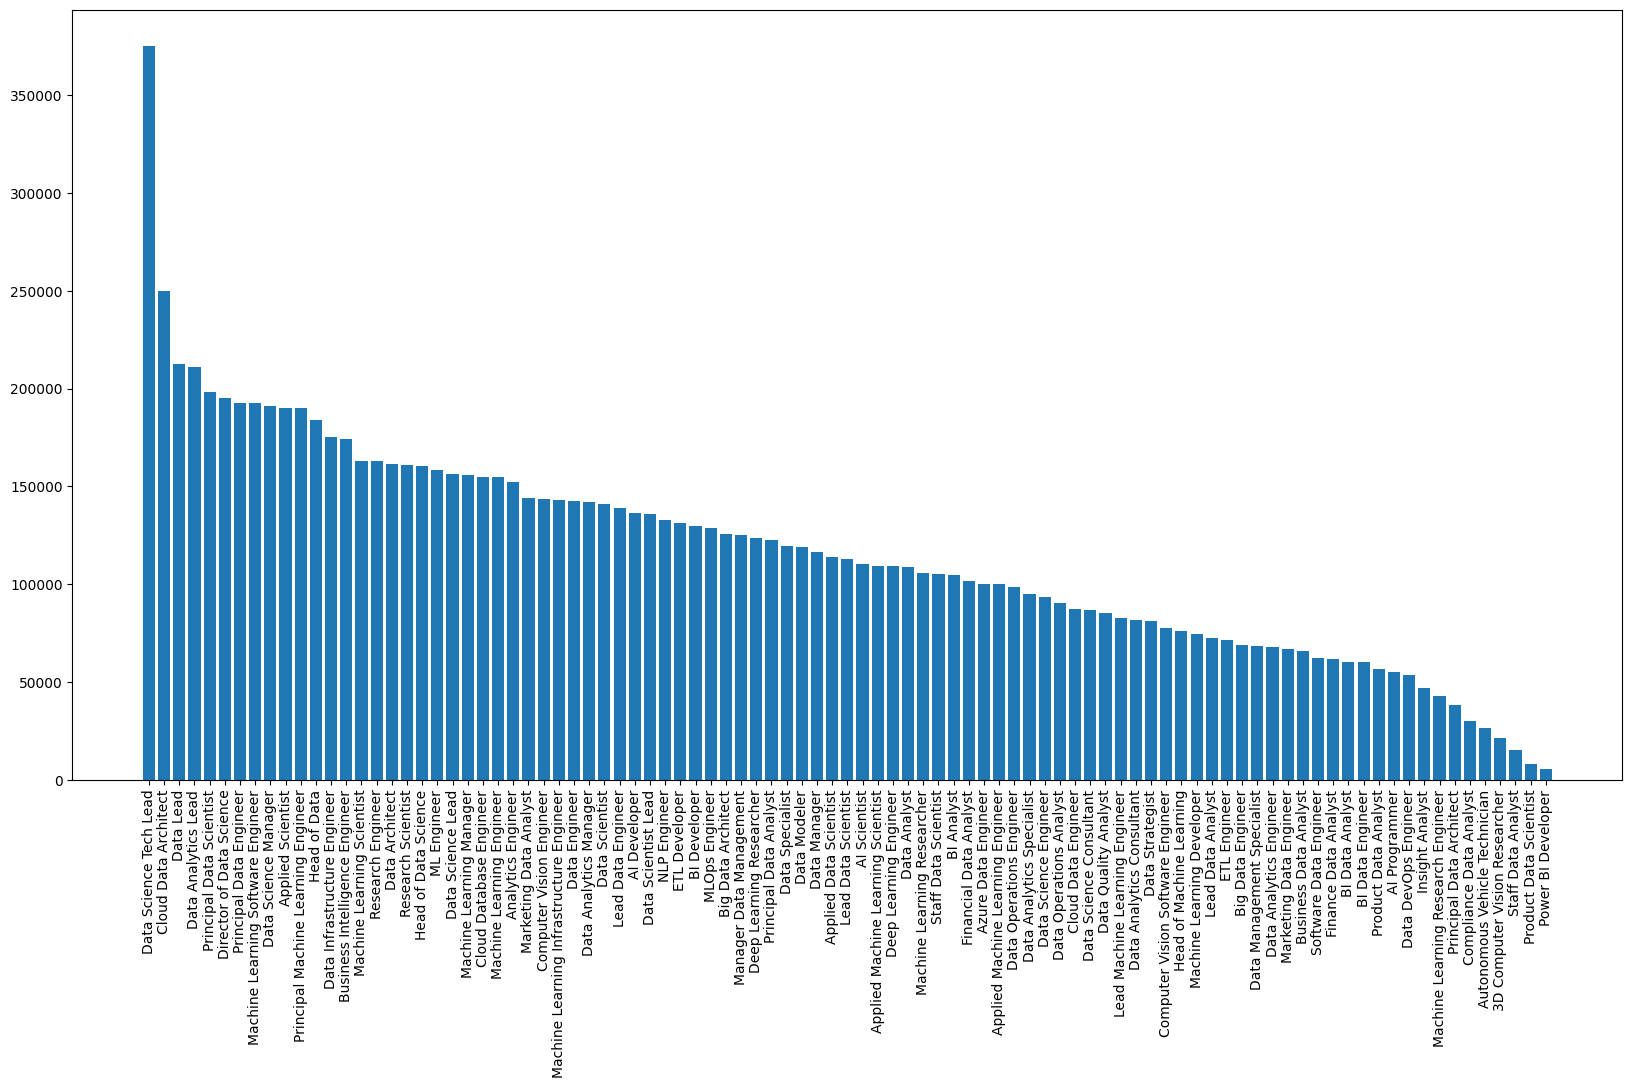

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(comp1.index,comp1)
plt.xticks(rotation=90)
plt.show()

## job_title in each country vs salary average for each kind of job

In [ ]:
comp2=df.groupby(['job_title','company_location'])['salary_in_usd'].mean().sort_values(ascending=False)

In [ ]:
comp2

,,salary_in_usd
job_title,company_location,
AI Scientist,IL,423834.0
Data Analytics Lead,US,405000.0
Data Science Tech Lead,US,375000.0
AI Developer,IN,300000.0
Director of Data Science,US,294375.0
...,...,...
Big Data Engineer,CH,5882.0
Data Science Consultant,IN,5707.0
3D Computer Vision Researcher,IN,5409.0


### AI science

In [ ]:
comp2['AI Scientist']

,salary_in_usd
company_location,
IL,423834.000000
CA,200000.000000
CO,125000.000000
US,113428.571429
DK,45896.000000
ES,41717.000000
GH,30000.000000
AS,18053.000000


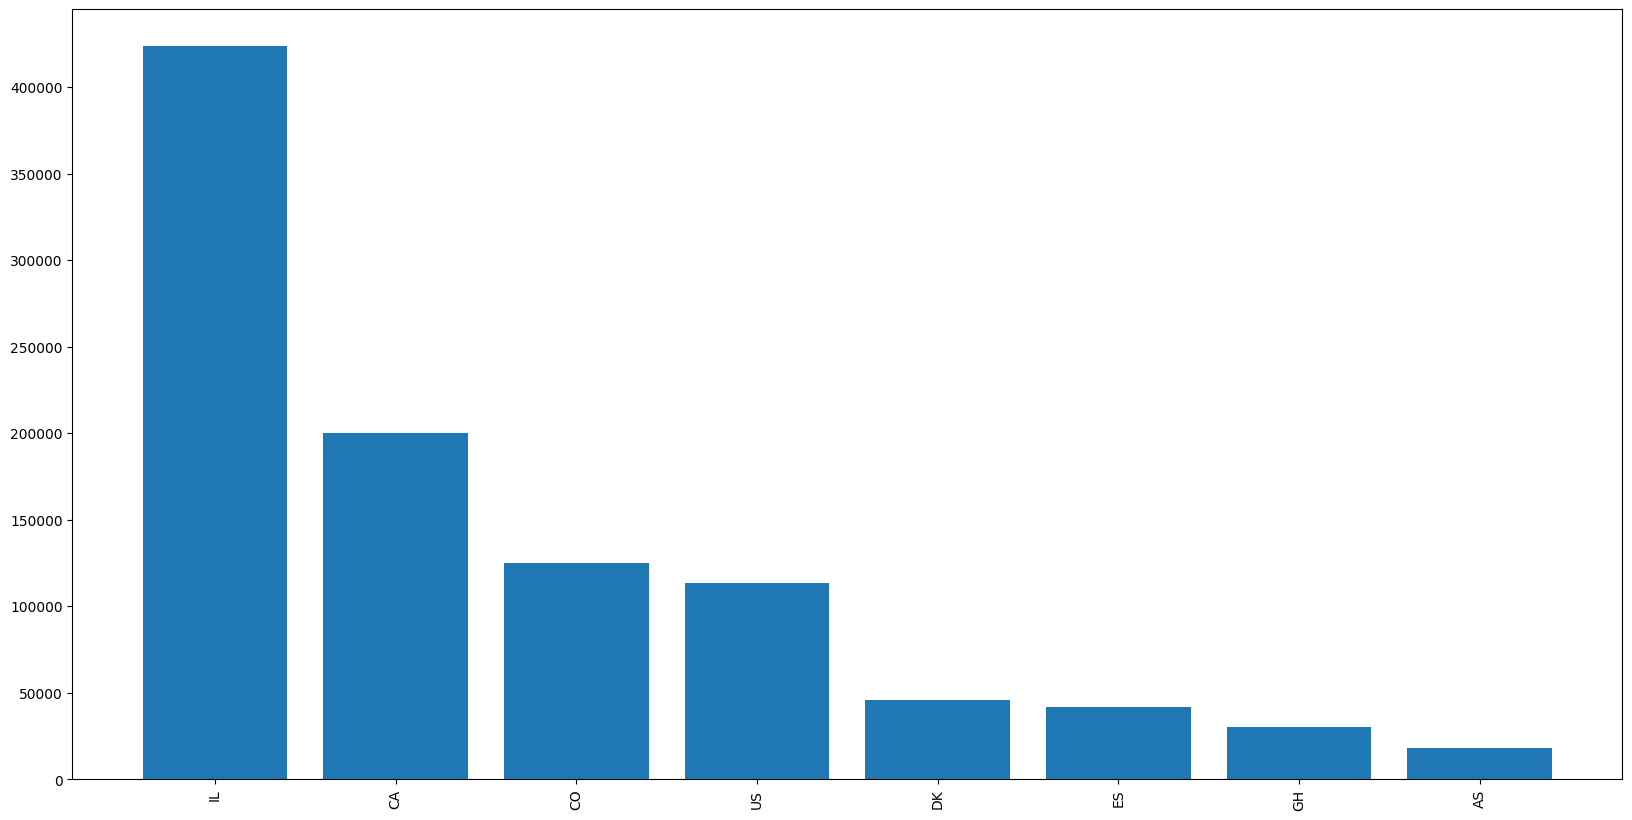

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(comp2['AI Scientist'].index,comp2['AI Scientist'])
plt.xticks(rotation=90)
plt.show()

## country job title vs salary

In [ ]:
comp4=df.groupby(['company_location','job_title'])['salary_in_usd'].mean().sort_values(ascending=False)

In [ ]:
comp4

company_location  job_title                    
IL                AI Scientist                     423834.0
US                Data Analytics Lead              405000.0
                  Data Science Tech Lead           375000.0
IN                AI Developer                     300000.0
US                Director of Data Science         294375.0
                                                     ...   
CH                Big Data Engineer                  5882.0
IN                Data Science Consultant            5707.0
                  Power BI Developer                 5409.0
                  3D Computer Vision Researcher      5409.0
CZ                NLP Engineer                       5132.0
Name: salary_in_usd, Length: 356, dtype: float64

### in US

In [ ]:
comp4['US']

,salary_in_usd
job_title,
Data Analytics Lead,405000.000000
Data Science Tech Lead,375000.000000
Director of Data Science,294375.000000
Principal Data Scientist,255500.000000
Cloud Data Architect,250000.000000
...,...
Data Quality Analyst,82863.333333
BI Data Analyst,82709.833333
Data Analytics Consultant,81500.000000


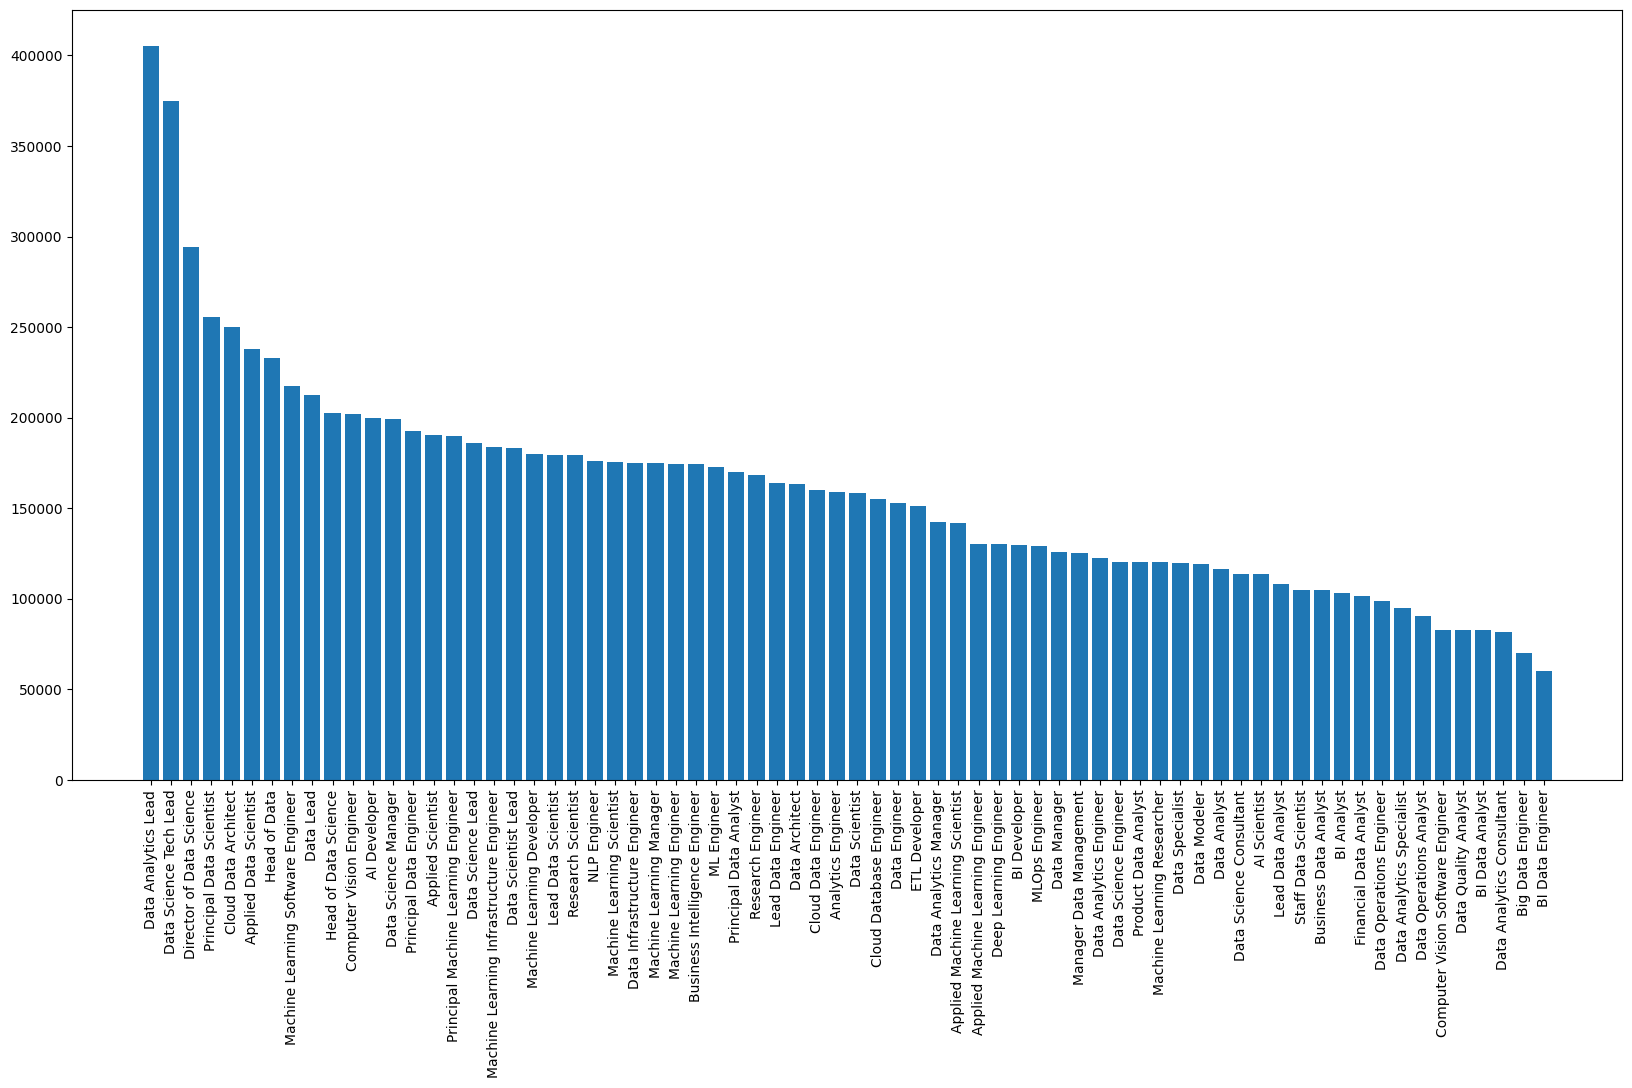

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(comp4['US'].index,comp4['US'])
plt.xticks(rotation=90)
plt.show()

## company size vs salary

In [ ]:
comp3=df.groupby('company_size')['salary_in_usd'].mean().sort_values(ascending=False)

In [ ]:
comp3

,salary_in_usd
company_size,
M,143130.548367
L,118300.982379
S,78226.682432


In [ ]:
comp3.index

Index(['M', 'L', 'S'], dtype='object', name='company_size')

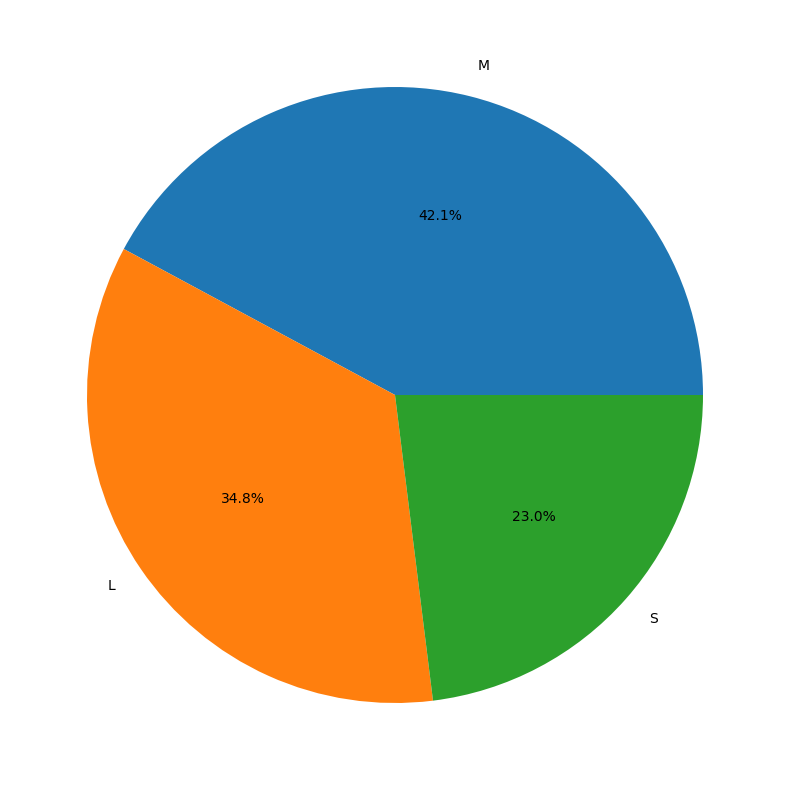

In [ ]:
plt.figure(figsize=(20,10))
plt.pie(comp3,labels=comp3.index,autopct='%1.1f%%')
plt.xticks(rotation=90)
plt.show()